In [ ]:
!nvidia-smi

Wed Jul 17 18:33:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 108MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 70.5MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 100.0ms
Speed: 13.6ms preprocess, 100.0ms inference, 854.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

/content


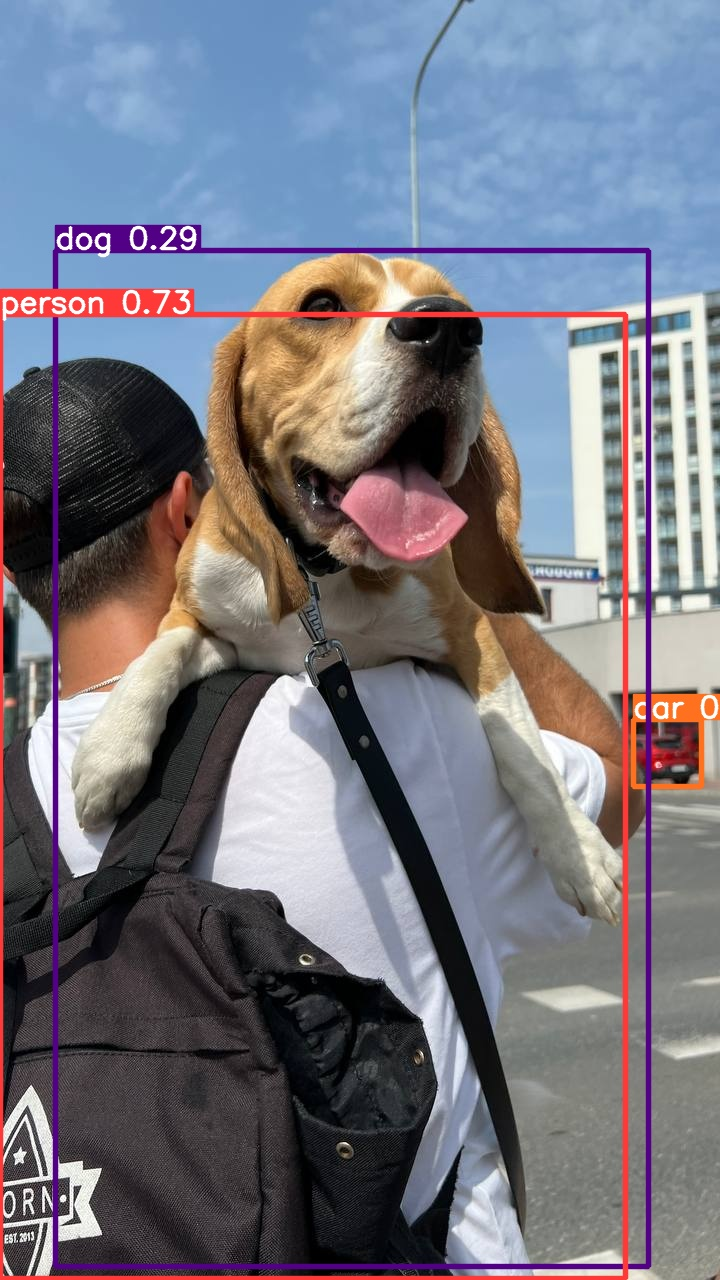

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UE5gxdrdt07gzrQ3k6Xt")
project = rf.workspace("banana-7c0fs").project("banana-euhm9")
version = project.version(6)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to banana-6 in yolov8:: 100%|██████████| 3982/3982 [00:00<00:00, 6125.82it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=320 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 263MB/s]
New https://pypi.org/project/ultralytics/8.2.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/banana-6/data.yaml, epochs=20, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1721241400.0f05b98cccfb.1106.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1080.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1081.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1082.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


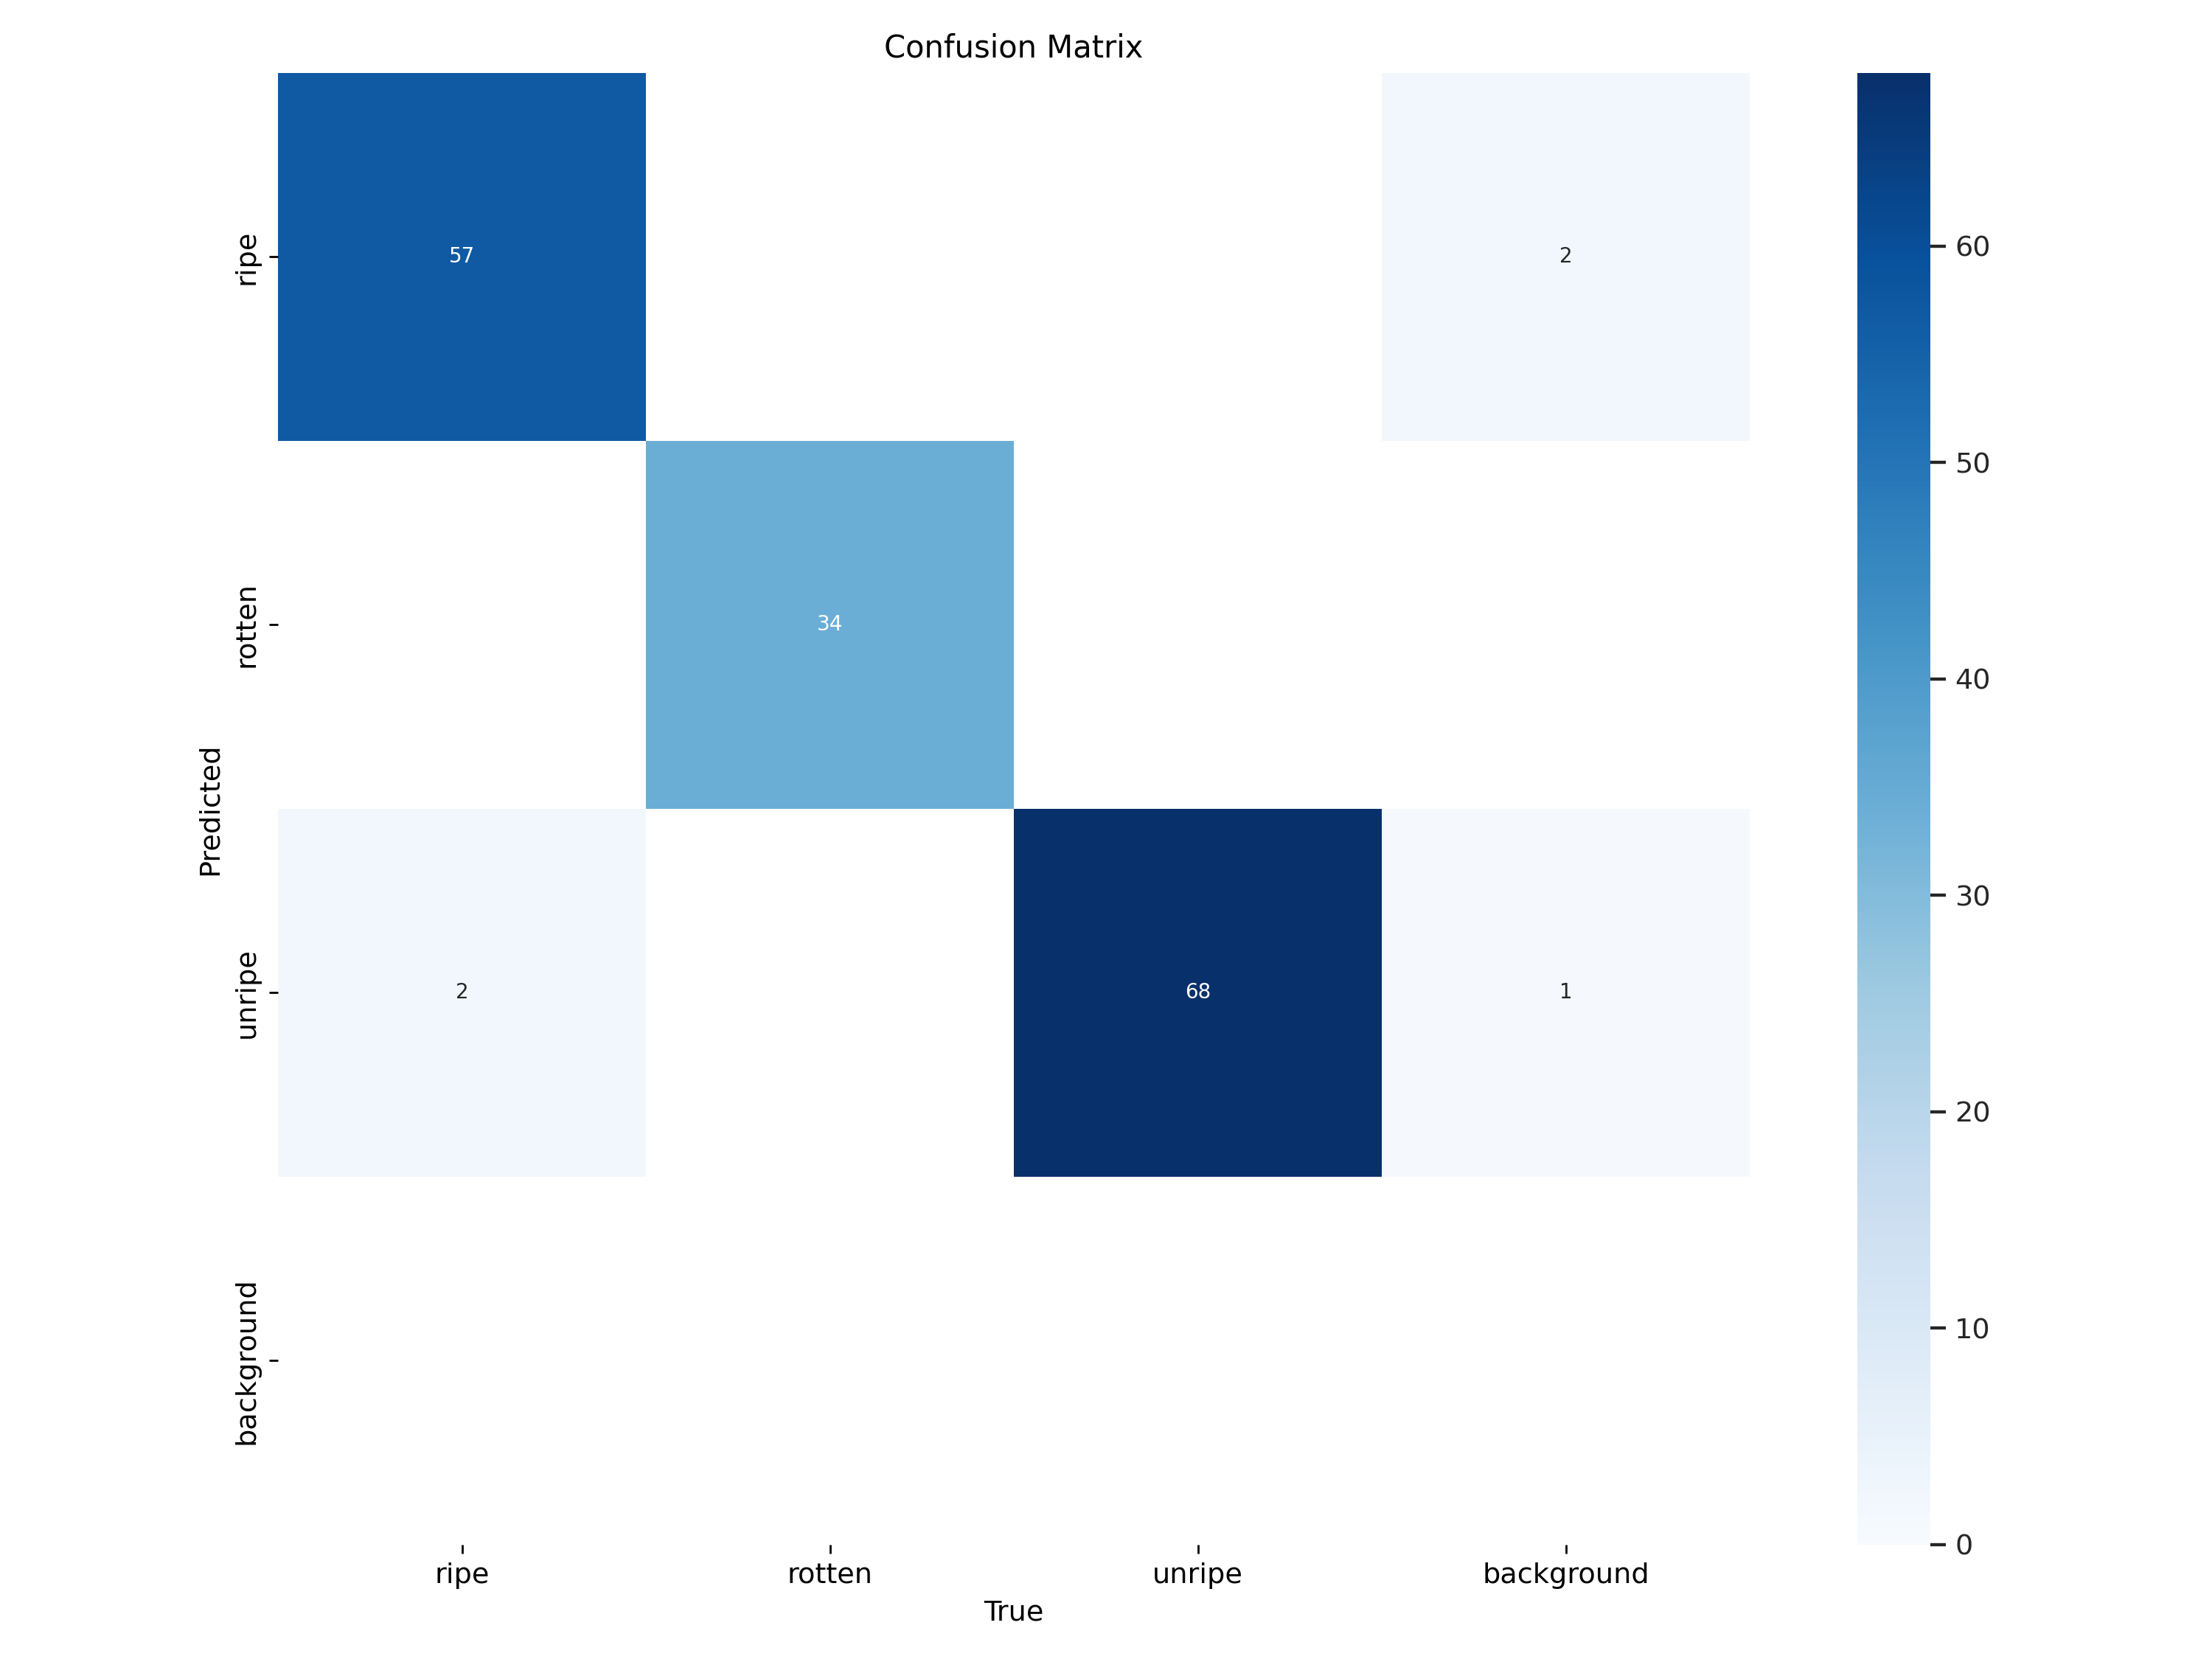

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


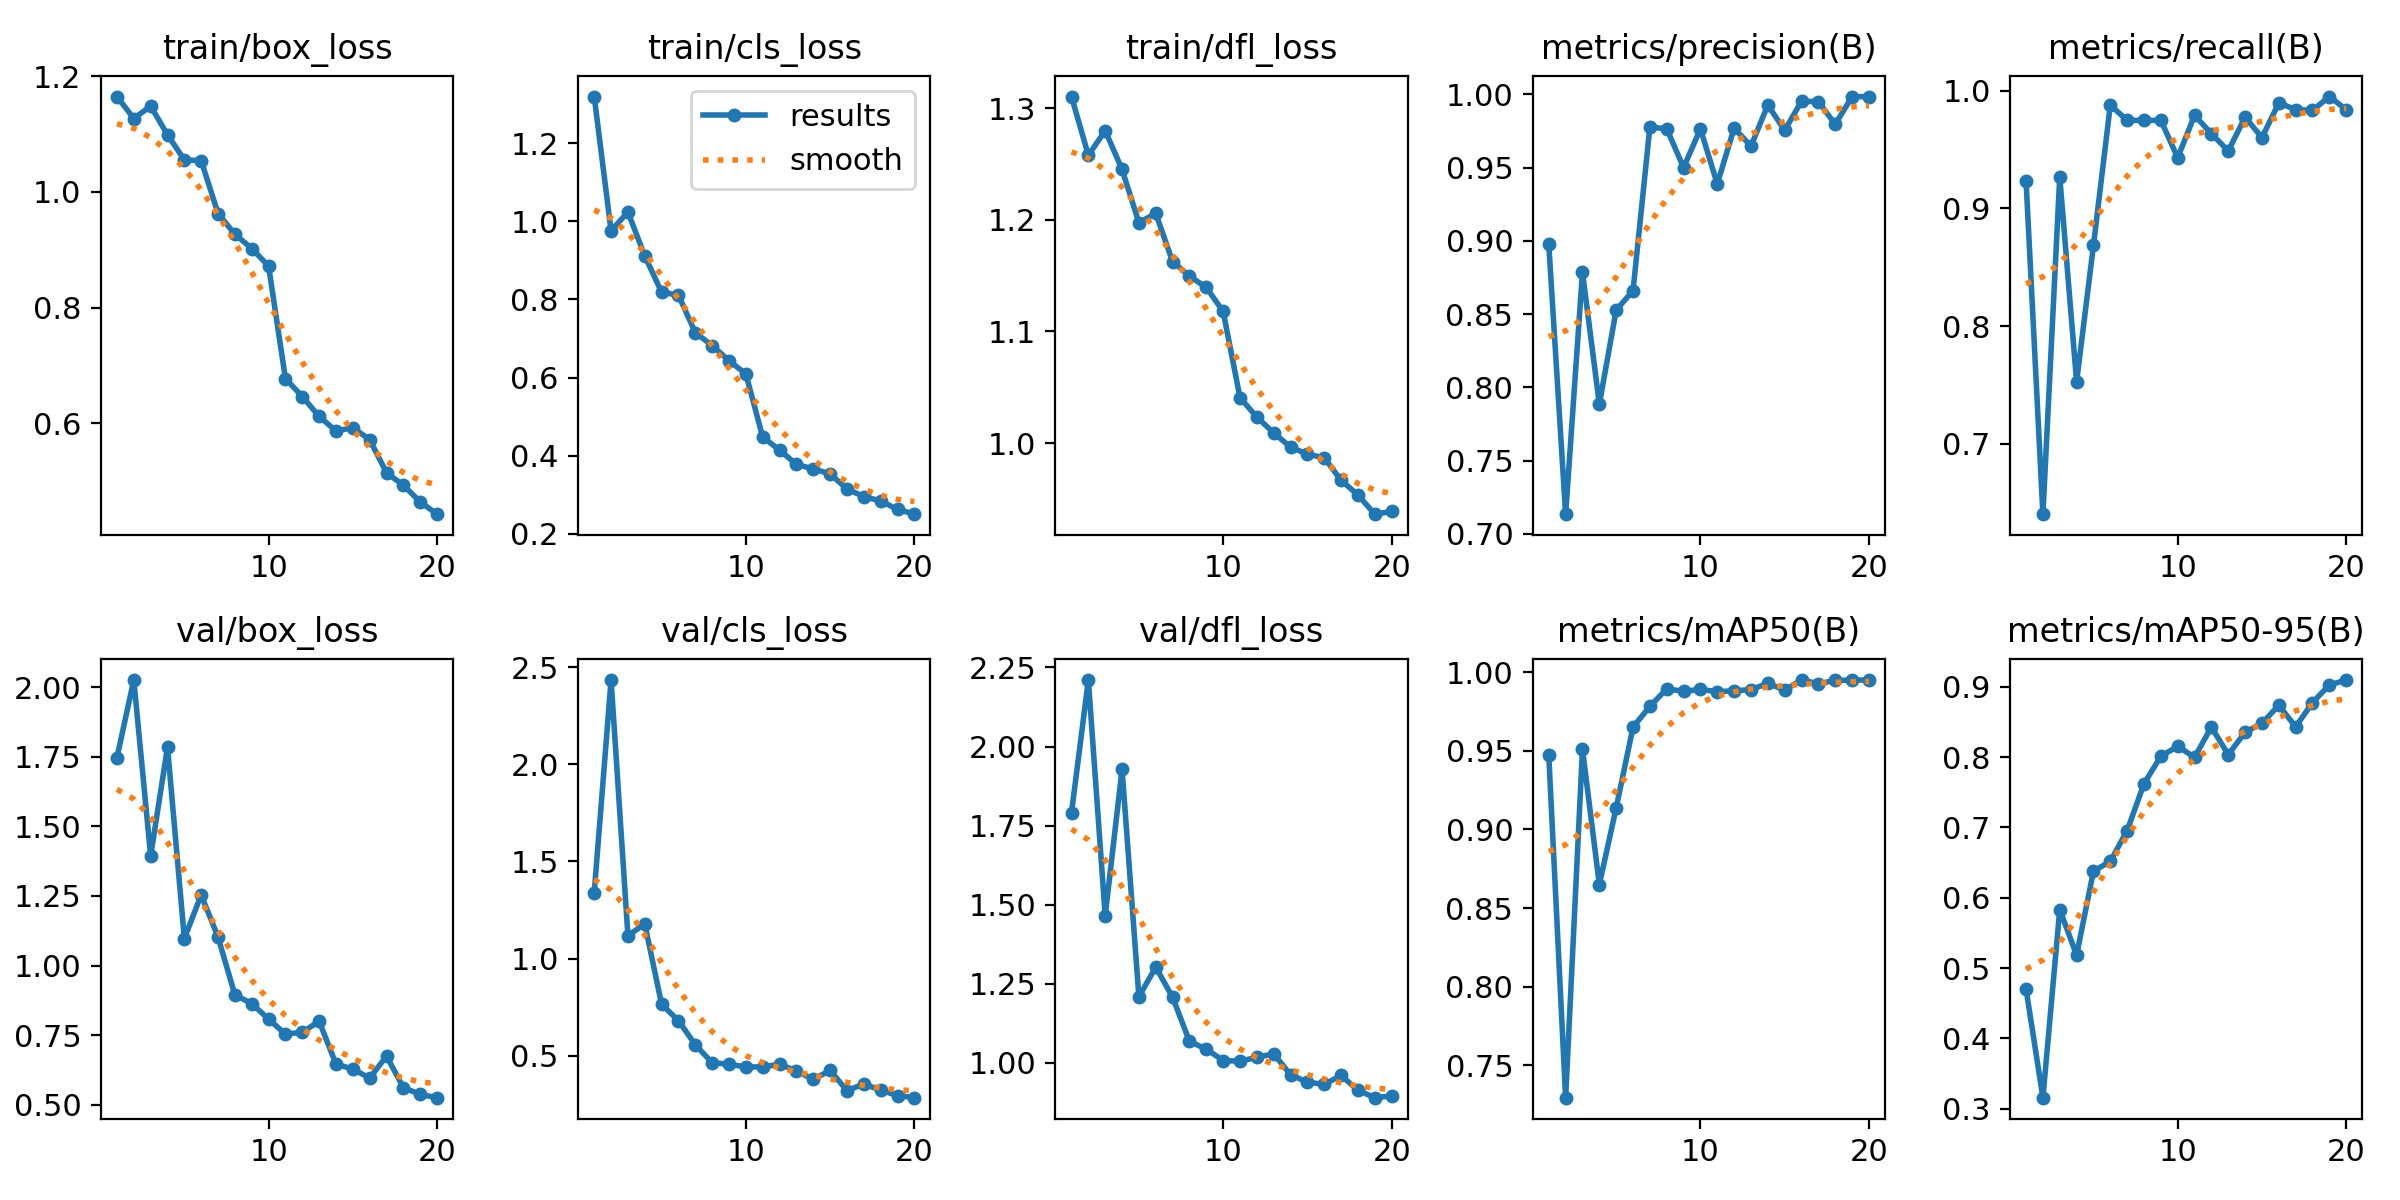

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


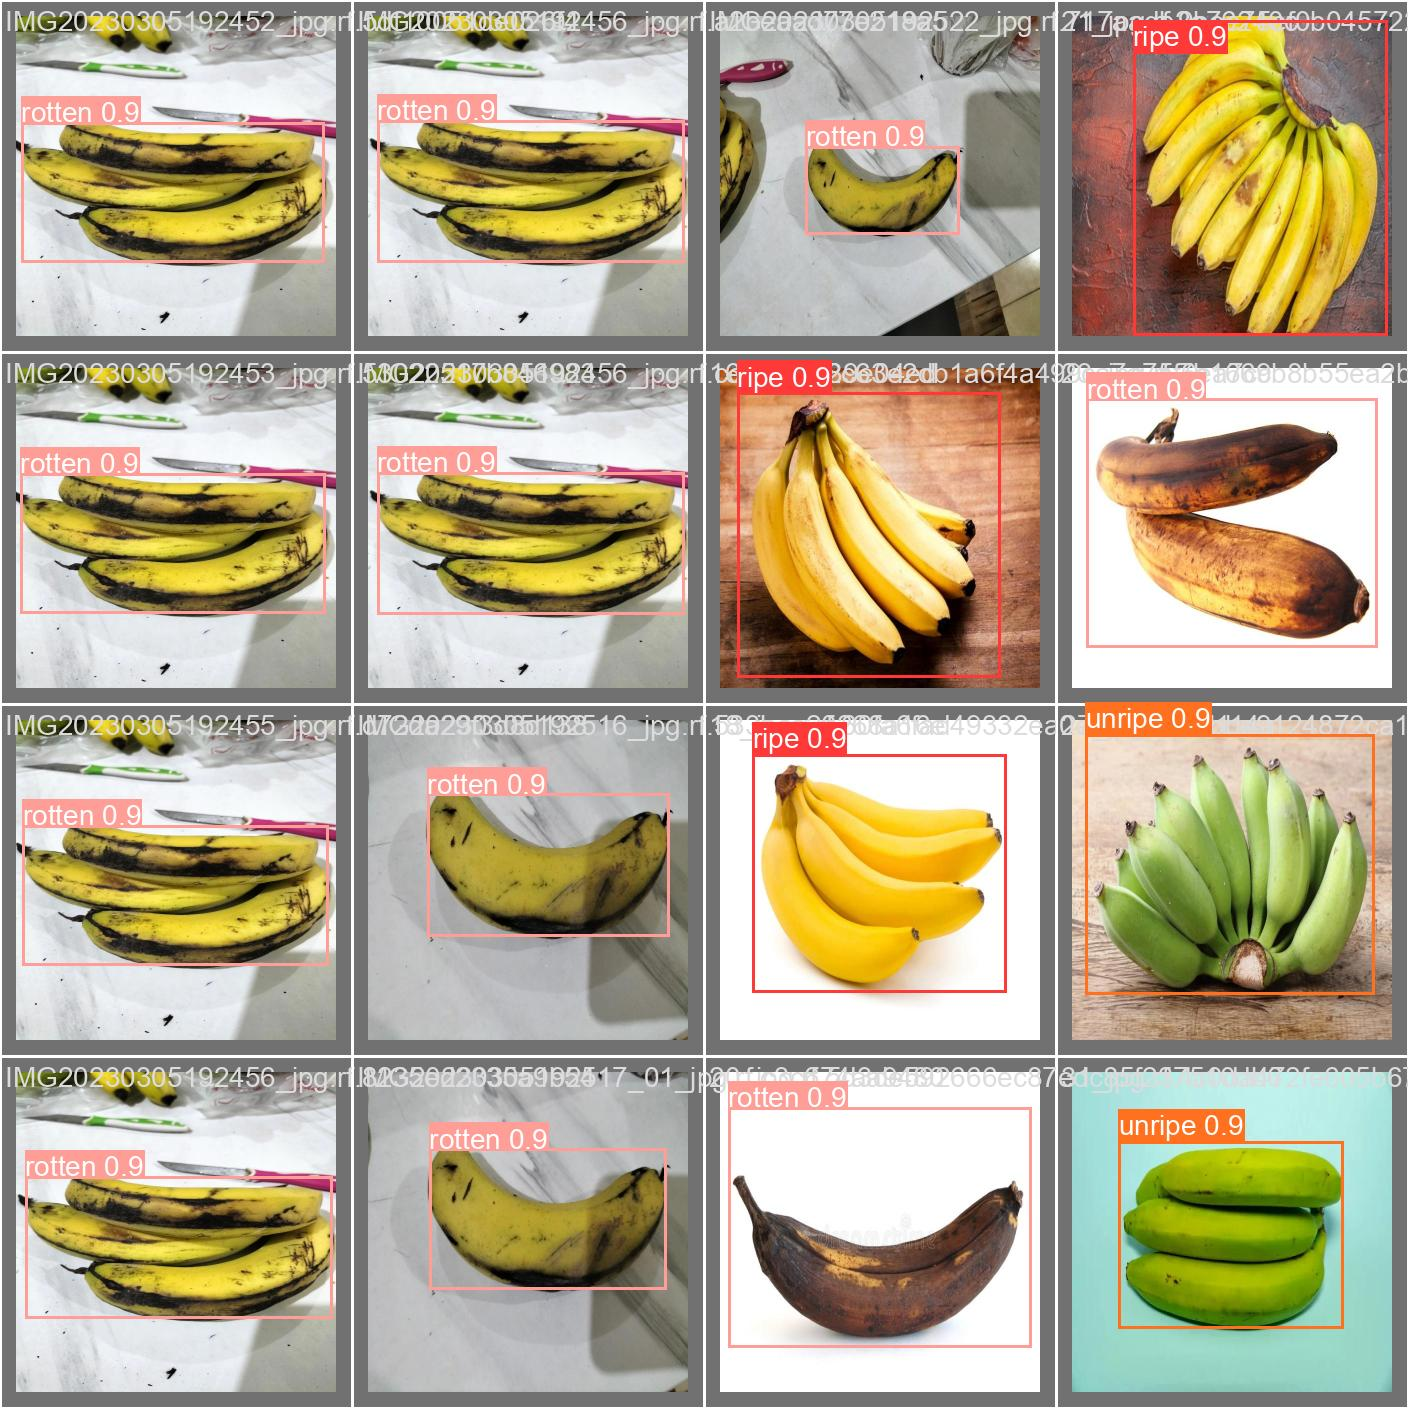

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/banana-6/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100% 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:05<00:00,  2.17it/s]
                   all        161        161      0.998      0.984      0.995      0.908
                  ripe        161         59          1      0.952      0.995      0.915
                rotten        161         34      0.998          1      0.995      0.926
                unripe        161         68      0.997          1      0.995      0.882
Speed: 1.5ms preprocess, 6.9ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/102 /content/datasets/banana-6/test/images/10_jpg.rf.aabb3cd56b34d2e5c30af1a7e46169fe.jpg: 320x320 1 ripe, 10.5ms
image 2/102 /content/datasets/banana-6/test/images/10_jpg.rf.ab71c26149be1574fca29e5a325ed8a4.jpg: 320x320 1 rotten, 8.1ms
image 3/102 /content/datasets/banana-6/test/images/12_jpg.rf.04e6c1ea676a62146fc550dada127b46.jpg: 320x320 1 ripe, 1 rotten, 8.0ms
image 4/102 /content/datasets/banana-6/test/images/15_jpg.rf.a858091f6c75ec23ba0acf1ada36b00a.jpg: 320x320 1 rotten, 8.0ms
image 5/102 /content/datasets/banana-6/test/images/17_jpg.rf.670ea00cb9d0181f599aaa06fd691ea5.jpg: 320x320 1 ripe, 8.0ms
image 6/102 /content/datasets/banana-6/test/images/1_jpg.rf.30d0f660d1421930137a5bc2a74822b6.jpg: 320x320 1 ripe, 8.0ms
image 7/102 /content/datasets/banana-6/

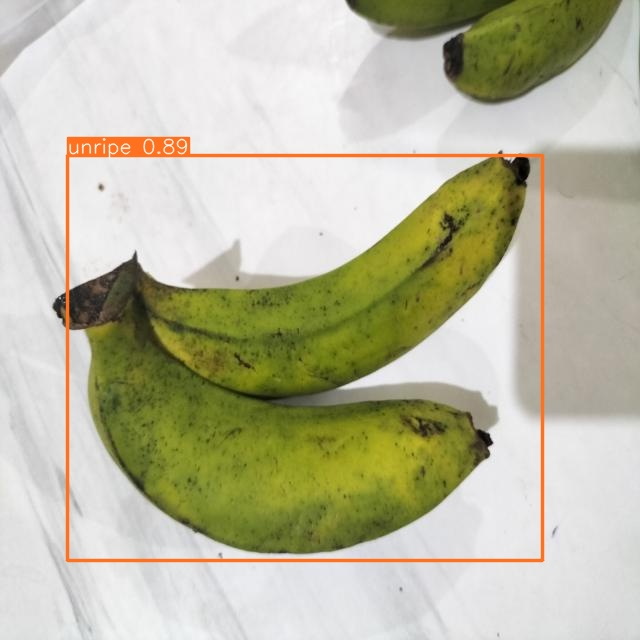

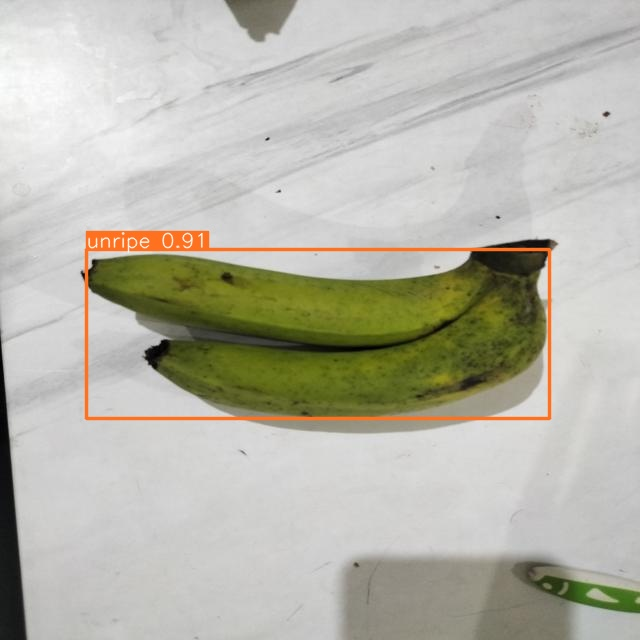

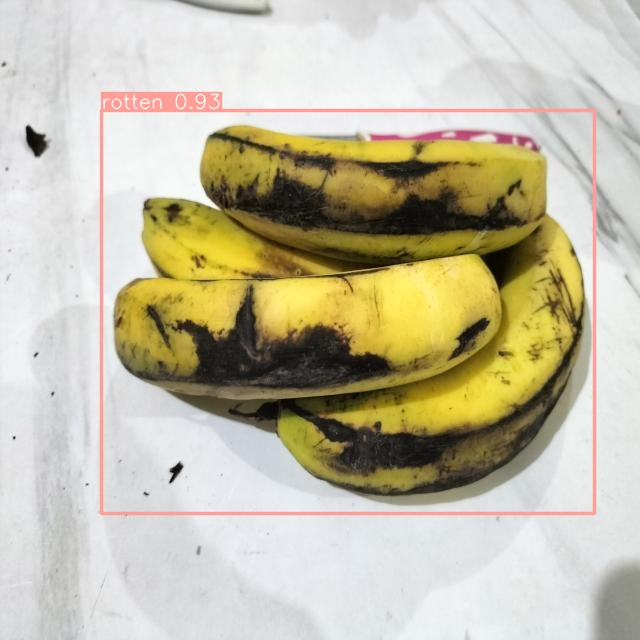

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp -av "/content/runs" "/content/drive/MyDrive/Banana"

'/content/runs' -> '/content/drive/MyDrive/Banana/runs'
'/content/runs/detect' -> '/content/drive/MyDrive/Banana/runs/detect'
'/content/runs/detect/predict' -> '/content/drive/MyDrive/Banana/runs/detect/predict'
'/content/runs/detect/predict/dog.jpeg' -> '/content/drive/MyDrive/Banana/runs/detect/predict/dog.jpeg'
'/content/runs/detect/train' -> '/content/drive/MyDrive/Banana/runs/detect/train'
'/content/runs/detect/train/weights' -> '/content/drive/MyDrive/Banana/runs/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/Banana/runs/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/Banana/runs/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/drive/MyDrive/Banana/runs/detect/train/args.yaml'
'/content/runs/detect/train/events.out.tfevents.1721241400.0f05b98cccfb.1106.0' -> '/content/drive/MyDrive/Banana/runs/detect/train/events.out.tfevents.1721241400.0f05b98cccf

In [ ]:
!pip install ultralytics

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/Banana/runs/detect/train/weights/best.pt", "/content")

'/content/best.pt'

In [ ]:
!yolo export model=/content/best.pt format=tflite

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (21.4 MB)
2024-07-17 18:50:28.289459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 18:50:28.289510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 18:50:28.290944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5'